In [1]:
#Calculate and chart:
#Number of complaints by product (Product)
#Number of complaints by company (top 10 companies only) (Company)
#Number of complaints by company response
#Mean number of complaints by day of week
#Any other insights you find interesting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
dec_complaints = pd.read_csv("complaints_dec_2014.csv")
dec_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [9]:
compl_by_prod = dec_complaints["Product"].value_counts()

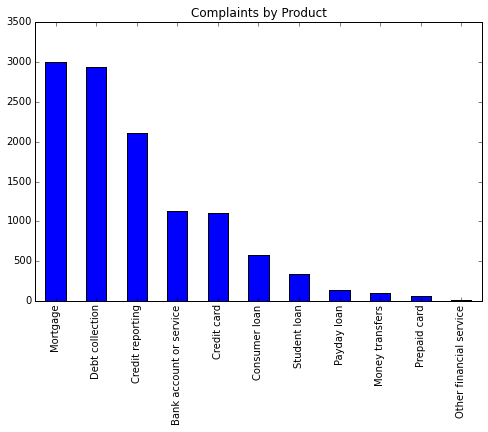

In [85]:
compl_by_prod.plot(figsize=(8, 5), kind="bar", title="Complaints by Product")
plt.show()

For the number of complaints by product, 'mortgage' has a small lead on 'debt collection' for December 2014, followed by 'credit reporting' and then 'bank account or service' just about tied with 'credit card' to round out the top five. Perhaps what is most striking about these numbers is how many more complaints there were about 'mortgage' and 'debt collection' compared to the other products - nearly 1000 more complaints than 'credit reporting' in third and almost triple the number of complaints compared to fourth and fifth.

In [12]:
compl_by_comp = dec_complaints["Company"].value_counts()

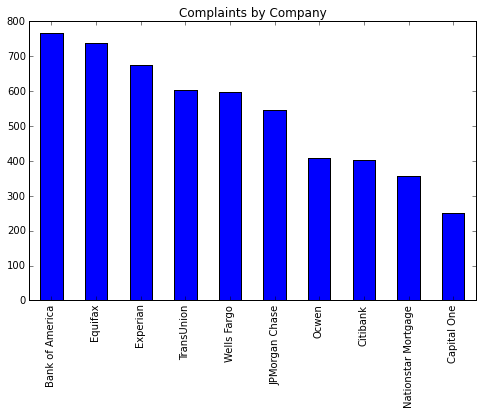

In [82]:
compl_by_comp.head(10).plot(figsize=(8, 5), kind="bar", title="Complaints by Company")
plt.show()

The differences aren't as great when comparing complaints by company as they were when looking at complaints by product. The dropoff from one company to the next is not so large. Bank of America holds down the number one spot with the most complaints, nearly 800. The three credit reporting agencies follow, with Wells Fargo at number five. This matches the above data on product complaints, as BofA is one of the largest mortgage providers along with Wells Fargo, and the credit reporting agencies obviously would have complaints about credit reporting and could also potentially be related to the debt collection numbers.

In [14]:
compl_by_resp = dec_complaints["Company response"].value_counts()

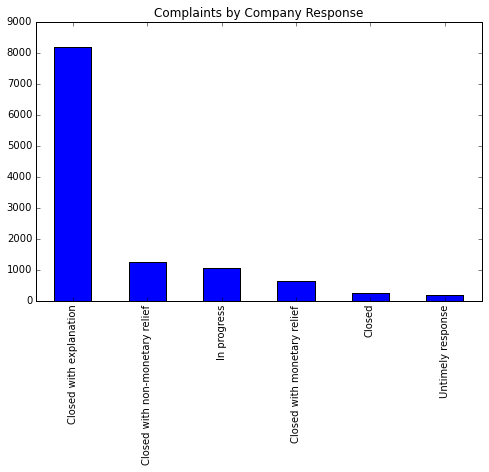

In [83]:
compl_by_resp.plot(figsize=(8, 5), kind="bar", title="Complaints by Company Response")
plt.show()

These numbers aren't even close. By far, most complaints are closed with some explanation from the company, while the sum of the other responses together doesn't even reach half that number. It would appear that getting any kind of relief from a company, whether financial or not, is a long shot.

In [16]:
dec_complaints["Date received"] = pd.to_datetime(dec_complaints["Date received"])

In [17]:
dec_complaints["Day of week"] = dec_complaints["Date received"].dt.dayofweek

In [39]:
dec_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Day of week
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2


In [26]:
dow_counts = dec_complaints["Day of week"].value_counts()

In [27]:
dow_counts

1    2580
0    2544
2    2289
3    1634
4    1446
5     543
6     507
dtype: int64

In [60]:
dow_complaints = dec_complaints.set_index("Date received")["Day of week"]

In [61]:
dow_total = dec_complaints.groupby("Date received").size()

In [41]:
dow_monday = dec_complaints[dec_complaints["Day of week"] == 0]

In [44]:
dow_mon_count = dow_monday["Date received"].value_counts()

In [45]:
dow_mon_count

2014-12-22    537
2014-12-29    532
2014-12-08    526
2014-12-15    475
2014-12-01    474
dtype: int64

In [47]:
avg_mon_compl = dow_mon_count.mean()

In [52]:
dow_tuesday = dec_complaints[dec_complaints["Day of week"] == 1]

In [53]:
dow_tues_count = dow_tuesday["Date received"].value_counts()

In [54]:
avg_tues_compl = dow_tues_count.mean()

In [65]:
dow_wednesday = dec_complaints[dec_complaints["Day of week"] == 2]
dow_wed_count = dow_wednesday["Date received"].value_counts()
avg_wed_compl = dow_wed_count.mean()

In [66]:
dow_thursday = dec_complaints[dec_complaints["Day of week"] == 3]
dow_thurs_count = dow_thursday["Date received"].value_counts()
avg_thurs_compl = dow_thurs_count.mean()

In [67]:
dow_friday = dec_complaints[dec_complaints["Day of week"] == 4]
dow_fri_count = dow_friday["Date received"].value_counts()
avg_fri_compl = dow_fri_count.mean()

In [68]:
dow_saturday = dec_complaints[dec_complaints["Day of week"] == 5]
dow_sat_count = dow_saturday["Date received"].value_counts()
avg_sat_compl = dow_sat_count.mean()

In [69]:
dow_sunday = dec_complaints[dec_complaints["Day of week"] == 6]
dow_sun_count = dow_sunday["Date received"].value_counts()
avg_sun_compl = dow_sun_count.mean()

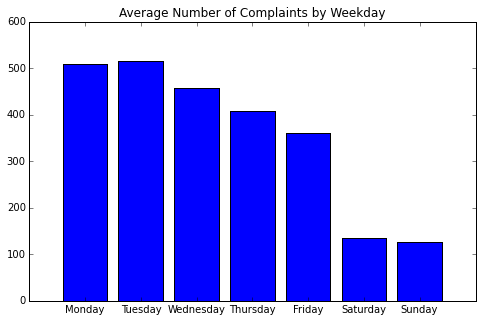

In [79]:
x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
y = [avg_mon_compl, avg_tues_compl, avg_wed_compl, avg_thurs_compl, avg_fri_compl, avg_sat_compl, avg_sun_compl]
fig = plt.figure(figsize=(8, 5))
plt.bar(range(len(y)), y, align="center")
plt.xticks(range(len(y)), x)
plt.title("Average Number of Complaints by Weekday")
plt.show()

This is the average number of complaints on any particular weekday from December 2014 (not the total number). Tuesday is the day of the week with the most complaints on average, followed closely by Monday. Apparently people want to get it done early in the week. All I have at this point is speculation as to why that is - maybe they've taken the weekend to organize their finances and go through mail and Monday is the first day they can register a complaint. Perhaps they've received a phone call on Monday so they register a complaint on Tuesday. These are only guesses.

In [90]:
cons_disp = dec_complaints["Consumer disputed?"].value_counts()
cons_disp

Yes    1932
dtype: int64

Of 11,543 complaints, 1932 of the company responses were disputed by the consumer.

In [94]:
timely_resp = dec_complaints["Timely response?"].value_counts()
timely_resp

Yes    11190
No       353
dtype: int64

Of 11,543 complaints, 353 did not receive a timely response. Below are the worst offenders with regard to not giving a timely response.

In [95]:
comp_late_resp = dec_complaints[dec_complaints["Timely response?"] == "No"]

In [97]:
comp_late_resp["Company"].value_counts().head(20)

Ocwen                                     25
Residential Credit Solutions              12
Premier Recovery Group                    11
Google Inc.                               11
Enhanced Acquisitions, LLC                10
Mobiloans, LLC                             7
Rash Curtis and Associates                 7
Delray Capital, LLC                        7
Rubin & Yates, LLC                         6
Harvard Collections, LLC                   5
Integrated Recovery Services               4
First Financial Asset Management, Inc.     4
Hillcrest Davidson & Assoc                 4
NRA Group, LLC                             4
LHR Inc.                                   4
Lazarus Financial Group, Inc.              4
Statebridge Company                        4
JPMorgan Chase                             3
Hunter Warfield, Inc.                      3
Brennan & Clark, Ltd., LLC                 3
dtype: int64

In [98]:
state_compl = dec_complaints["State"].value_counts()
state_compl

CA    1591
TX    1099
FL    1093
NY     733
GA     512
NJ     465
IL     427
PA     418
VA     373
OH     348
MD     342
MI     287
NC     287
WA     231
AZ     213
MA     200
TN     192
CO     180
NV     159
AL     147
WI     143
MN     135
IN     132
SC     130
LA     127
OR     120
MO     119
CT     109
OK      93
DC      82
UT      70
AR      59
KY      59
MS      57
KS      56
NM      55
IA      51
HI      48
NH      46
DE      44
RI      40
ID      39
ME      39
NE      37
PR      27
WV      26
SD      22
VT      18
AK      15
MT      14
WY       8
ND       8
VI       5
AE       5
AS       1
AP       1
dtype: int64